# Simpsons Characters with my own LVGG in Keras

## 1 - Downloading and Extracting dataset from Drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'004 - Asynchronous Parallel Game-Tree Search (1998) .pdf'
'04 06 - 10 06.gsheet'
 17-flowers.tar.gz
 183.pdf
 9781786464392-ARTIFICIAL_INTELLIGENCE_WITH_PYTHON.pdf
'action_model1 (1).h5'
 action_model1.h5
'Apresentação sem título.gslides'
'Artigos Interessantes RoboCup.gdoc'
 Backup
 BACKUP_LDA.rar
 Beginning-Game-Development-With-Python-And-Pygame-2007-McGugan.pdf
'CARTA MOTIVAÇÃO.gdoc'
 CM
'Colab Notebooks'
'Computação Científica com Python.pdf'
'Congressos IA 2018.gsheet'
'Controle Financeiro.gsheet'
 curriculo.xml
'Curriculum Vitae - Rita Maria da Silva Julia.gdoc'
'Documento sem título.gdoc'
 EA_Content_Usage_Permission_Request_Form_022516.pdf
'Fifa Learning.rar'
 game-tree-search-on-massively-parallel-systems.pdf
 GBC043_Aula24_KAREN.sql
'Gmail - ICTAI 2017 submission 209.pdf'
 Invent-Your-Own-Computer-Games-with-Python-2e-2010-Sweigart.pdf
 JogadorValquiria.zip
'LabBruno (1).rar'
'LabBruno (2).rar'
'LabBruno (3).rar'
 LabBruno.rar
'LabMariana (1).rar'
 LabMariana.rar
 

In [0]:
import os
import tarfile

local_tar_gz = '/content/drive/My Drive/simpsons.tar.gz'
tar_gz_ref = tarfile.open(local_tar_gz, "r:gz")
tar_gz_ref.extractall('/tmp')
tar_gz_ref.close()

## Preprocessing data and creating generators

In [4]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = '/tmp/simpsons/train'
validation_data_dir = '/tmp/simpsons/validation'

# Let's use some data augmentation 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Using TensorFlow backend.


Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


## 3 - Building the LVGG model

In [5]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

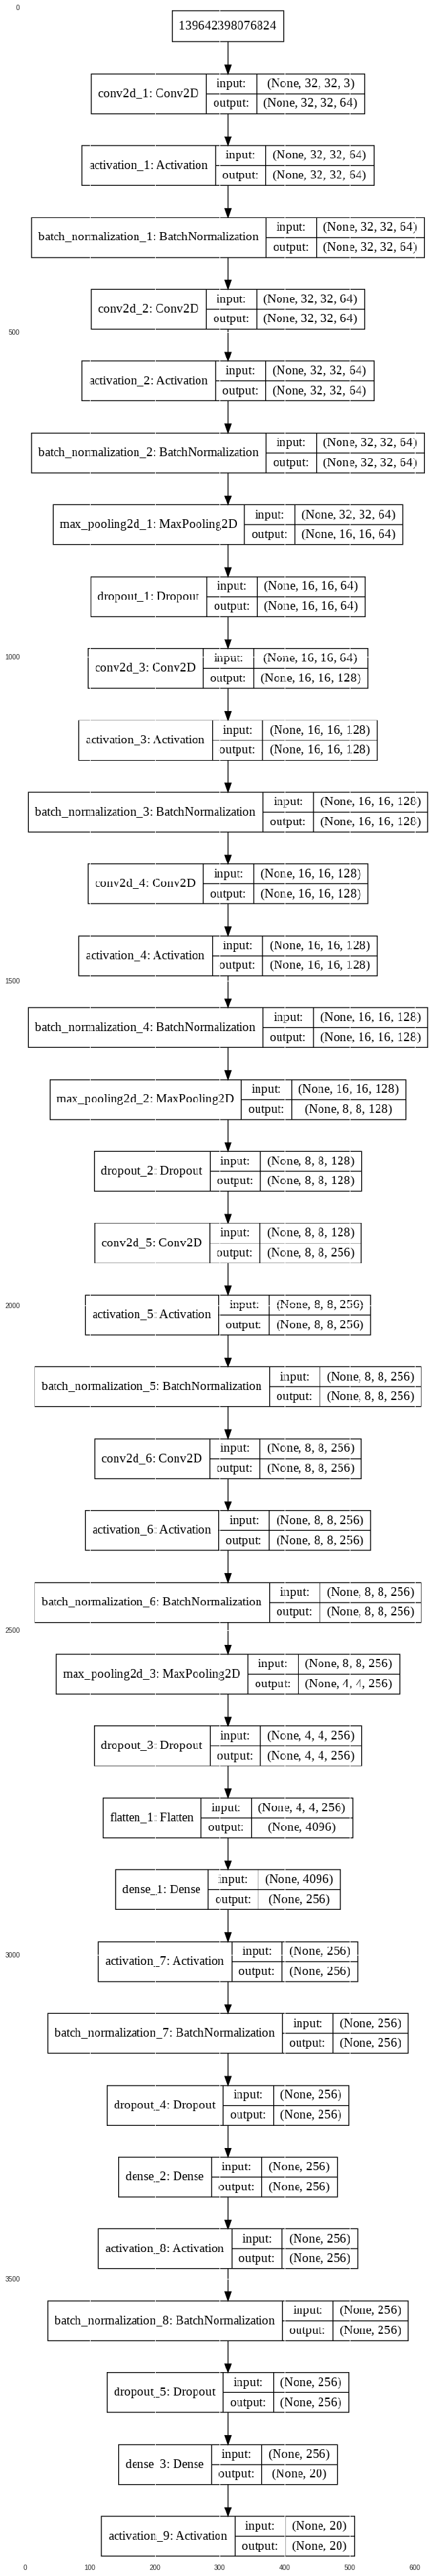

In [6]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img) 

## 4 - Training and Testing the LVGG model

In [7]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("simpsons_lvgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - 104s 85ms/step - loss: 2.8538 - acc: 0.1665 - val_loss: 2.5083 - val_acc: 0.2848

Epoch 00001: val_loss improved from inf to 2.50825, saving model to simpsons_lvgg.h5
Epoch 2/10
1221/1221 [==============================] - 99s 81ms/step - loss: 2.2525 - acc: 0.3097 - val_loss: 3.5422 - val_acc: 0.2669

Epoch 00002: val_loss did not improve from 2.50825
Epoch 3/10
1221/1221 [==============================] - 99s 81ms/step - loss: 1.8592 - acc: 0.4385 - val_loss: 1.6989 - val_acc: 0.5133

Epoch 00003: val_loss improved from 2.50825 to 1.69888, saving model to simpsons_lvgg.h5
Epoch 4/10
1221/1221 [==============================] - 99s 81ms/step - loss: 1.5987 - acc: 0.5262 - val_loss: 1.5138 - val_acc: 0.5667

Epoch 00004: val_loss improved from 1.69888 to 1.51379, saving model to simpsons_lvgg.h5
Epoch 5/10
1221/1221 [==============================] - 99s 81ms/step - loss: 1.4422 - acc: 0.5786 - val_loss: 1.4442 - val_acc: 0.6006

